## Stellar Classification

An exploration of a set 100,000 observations of stars, galaxies, and quasars done by the Sloan Digital Sky Survey. The data for this project can be found using the link below:

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download



In [213]:
#Requirements

import pandas as pd
import matplotlib.pyplot as plt
 


## Key Definitions

Below is a dictionary containing brief definitions of each stellar characteristic. While navigating this code it is possible at any time to call the definition of a characteristic using data_key['desired_characteristic']

In [214]:
#Creating a dictionary to print each descriptor 

data_key = {
    "obj_ID" : "0bj_ID = object indentifier, the unique value that identifies the object in the image catalog used by the CAS",
    "alpha" : "alpha = Right Ascension angle (at J2000 epoch)",
    "delta" : "delta = Declination angle (at J2000 epoch)",
    "u" : "u = Ultraviolet filter in the photometric system",
    "g" : "g = Green filter in the photometric system",
    "r" : "r = Red filter in the photometric system",
    "i" : "i = Near Infrared filter in the photometric system",
    "z" : "z = Infrared filter in the photometric system",
    "run_ID" : "run_ID = Run Number used to identify the specific scan",
    "rereun_ID" : "rerun_Id = Rerun Number to specify how the image was processed",
    "cam_col" : "cam_col = Camera column to identify the scanline within the run",
    "field_ID" : "field_ID = Field number to identify each field",
    "spec_obj_ID" : "spec_obj_ID = Unique ID used for optical spectroscopic objects",
    "class" : "class = object class, (galaxy, star, or quasar)",
    "redshift" : "redshift = redshift value based on the increase in wavelength",
}


In [215]:
#Pulling in the data

df = pd.read_csv('star_classification_data_original.csv')
df.head(10)


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [216]:
#Using the length function to check that the data set is complete

len(df)

100000

In [217]:
#Using the list function to check that I have all three types of stellar objects represented
#QSO means quasar

stellar_object = list(df['class'].unique())
stellar_object

['GALAXY', 'QSO', 'STAR']

In [218]:
#Finding the means of the characteristic columns

means = df.mean(numeric_only=True)
print(means)

obj_ID         1.237665e+18
alpha          1.776291e+02
delta          2.413530e+01
u              2.198047e+01
g              2.053139e+01
r              1.964576e+01
i              1.908485e+01
z              1.866881e+01
run_ID         4.481366e+03
rerun_ID       3.010000e+02
cam_col        3.511610e+00
field_ID       1.861305e+02
spec_obj_ID    5.783882e+18
redshift       5.766608e-01
plate          5.137010e+03
MJD            5.558865e+04
fiber_ID       4.493127e+02
dtype: float64


In [219]:
#Finding out how many individual observations occured for each stellar object

print(df.value_counts('class'))

class
GALAXY    59445
STAR      21594
QSO       18961
dtype: int64


It's significant to note here that there are far more galaxy observations represented in this data set than stars or quasars

In [220]:
df.min()



obj_ID         1237645942904389888.0
alpha                       0.005528
delta                     -18.785328
u                            -9999.0
g                            -9999.0
r                            9.82207
i                           9.469903
z                            -9999.0
run_ID                           109
rerun_ID                         301
cam_col                            1
field_ID                          11
spec_obj_ID     299519089380976640.0
class                         GALAXY
redshift                   -0.009971
plate                            266
MJD                            51608
fiber_ID                           1
dtype: object

In [221]:
df.max()

obj_ID          1237680531356386304.0
alpha                       359.99981
delta                       83.000519
u                            32.78139
g                            31.60224
r                            29.57186
i                            32.14147
z                            29.38374
run_ID                           8162
rerun_ID                          301
cam_col                             6
field_ID                          989
spec_obj_ID    14126940609093851136.0
class                            STAR
redshift                     7.011245
plate                           12547
MJD                             58932
fiber_ID                         1000
dtype: object

In [222]:
#defining and calling a function

def f(Class, redshift, alpha):
    print(f'{Class} with a redshift {redshift} has a right ascension angle of {alpha:.2f}')

f('Observed galaxy', 0.634794, 135.689107)

Observed galaxy with a redshift 0.634794 has a right ascension angle of 135.69


## Visualizing the Full Data Set

Here is an observation of trends in the redshift of the stellar objects. Sweeping the entire 0-360 right ascension angles gives a full picture of the amount of stellar observations spread across redshifts.


In [223]:
data_key['alpha']

'alpha = Right Ascension angle (at J2000 epoch)'

In [224]:
data_key['redshift']

'redshift = redshift value based on the increase in wavelength'

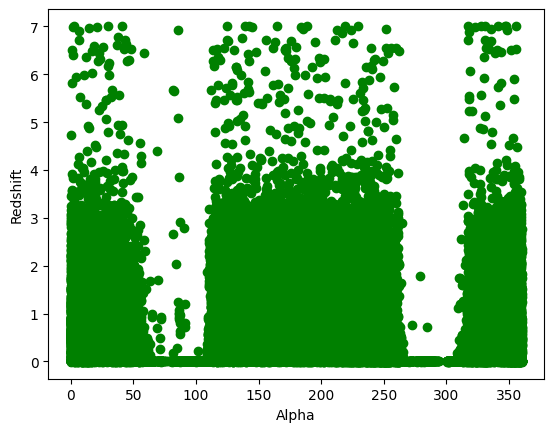

In [225]:
#Plotting right ascension and redshift

plt.scatter(x=df['alpha'],y=df['redshift'], c='g')
plt.xlabel('Alpha')
plt.ylabel('Redshift')
plt.show()



The scatterplot shows the majority of stellar objects experiencing a redshift from 0-~3.5 for right ascension angles between 0-60, 110-265, and 310-360. There is a considerable dip in data points at angles 60-110 and 265-310, possibly due to an incomplete scan or set of observations, or obstruction of the observation. The next section will further analyze which stellar object is most represented in the upper limit of the redshift (3.5-7.0)  

## Discovering Which Object is Hogging All the Redshift

In [226]:
data_key['class']

'class = object class, (galaxy, star, or quasar)'

In [227]:
data_key['redshift']

'redshift = redshift value based on the increase in wavelength'

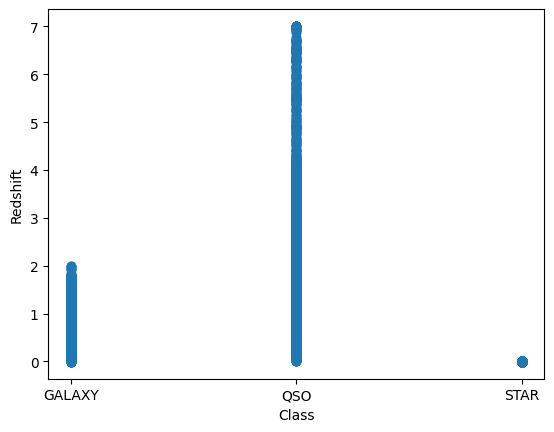

In [228]:
#Plotting class and redshift

x=df['class']
y=df['redshift']
plt.scatter(x,y)
plt.xlabel('Class')
plt.ylabel('Redshift')
plt.show()


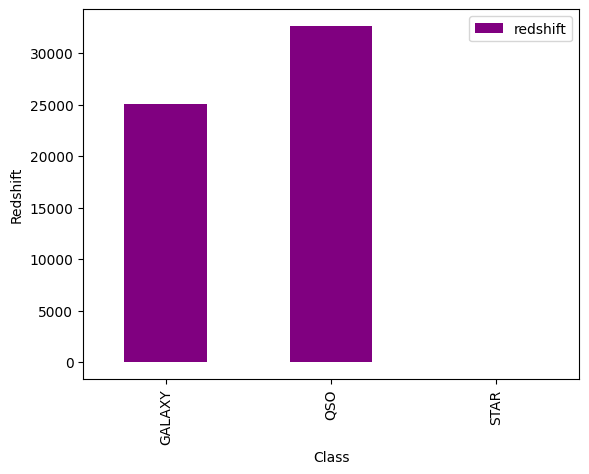

In [229]:
#plotting another way

df.groupby(['class'], as_index = False).sum().plot(kind = 'bar', x = 'class', y = 'redshift', color = 'purple')
plt.xlabel('Class')
plt.ylabel('Redshift')
plt.show()


The scatter plot in blue shows that the observations of redshift in the upper limit (3.5-7.0) are coming from quasars, while the bar graph confirms that quasars hold more of the redshift than galaxies or stars. Knowing that there are far fewer quasar observations in this set than galaxies or stars lends significance to these findings.

## Looking at Ultraviolet Radiation Signitures

In [230]:
data_key['u']

'u = Ultraviolet filter in the photometric system'

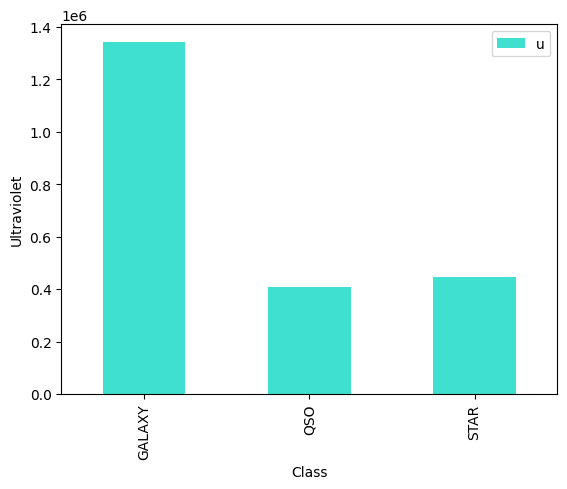

In [231]:
#Plotting class and total ultraviolet radiation

df.groupby(['class'], as_index = False).sum().plot(kind = 'bar', x = 'class', y = 'u', color = 'turquoise')
plt.xlabel('Class')
plt.ylabel('Ultraviolet')
plt.show()


Galaxies are responsible for the majority of the total ultraviolet radiation collected, but that may simply be due to the fact that there are so many more galaxies observed than other objects. (I'll pin further analysis for a future project)

## Cleaning the data

In [232]:
df2 = pd.read_csv('star_classification_data_clean.csv')
df2.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [233]:
#Checking that the data set is complete

len(df2)

100000

In [234]:
#Removing unwanted columns

df2.drop(['run_ID', 'rerun_ID', 'obj_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID', 'cam_col'], axis=1, inplace=True)

In [235]:
df2.head(10)

,alpha,delta,u,g,r,i,z,field_ID,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,GALAXY,0.116123
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,110,QSO,1.424659
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,462,QSO,0.586455
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,346,GALAXY,0.477009
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,108,GALAXY,0.660012
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,122,STAR,-0.000008


In [236]:
#dropping galaxies and stars from the set

df2.drop(df2.loc[df2['class']==str('GALAXY')].index, inplace=True)    
df2.drop(df2.loc[df2['class']==str('STAR')].index, inplace=True)


df2.head(10)

,alpha,delta,u,g,r,i,z,field_ID,class,redshift
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,110,QSO,1.424659
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,462,QSO,0.586455
17,1.494389,3.291746,20.38562,20.40514,20.29996,20.05918,19.89044,339,QSO,2.031528
23,145.883006,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,33,QSO,2.075680
33,20.052556,11.497881,21.89214,21.35124,21.18755,20.84300,20.76580,441,QSO,1.528308
47,228.447728,12.745032,22.36261,21.71060,21.59630,21.60179,21.12727,125,QSO,2.689002
48,345.221147,2.593462,21.90143,21.79169,21.44344,21.25545,21.07686,231,QSO,1.289637
51,168.726601,27.680925,21.65936,21.73216,21.61713,21.60229,21.24192,385,QSO,1.007728
71,178.504616,54.379157,21.77434,21.65529,21.77547,21.72382,21.66425,177,QSO,1.939080
72,144.742439,46.967191,20.87676,20.61914,20.55744,20.54716,20.15146,28,QSO,1.040196


The length of the set is now 18961 which agrees with the count for quasars calculated in previous sections.

In [237]:
len(df2)

18961

## Analyzing and Visualizing the clean data

Now the data set contains only quasars. Plotting redshift across all right ascension angles should give a slightly different result than in the previous plots

In [238]:
data_key['alpha']

'alpha = Right Ascension angle (at J2000 epoch)'

In [239]:
data_key['redshift']

'redshift = redshift value based on the increase in wavelength'

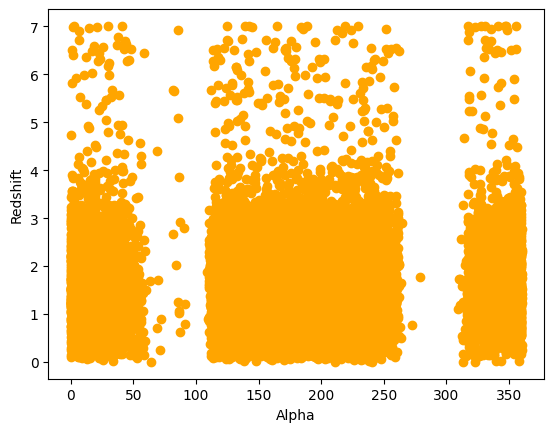

In [240]:
#Plotting alpha and redshift for only quasar observations

x=df2['alpha']
y=df2['redshift']
plt.scatter(x,y, c='orange')
plt.xlabel('Alpha')
plt.ylabel('Redshift')
plt.show()


There is still a clustering of redshift observations in the lower limit and a scattering of points in the upper limit. This plot is similar to the scatter plot obtained previously, however there is a significant lack of redshift observations in the lower limit near 0 observed at the angles 60-110 and 265-310. Looking at the min and max redshift of quasars below:

In [241]:
df.min()

obj_ID         1237645942904389888.0
alpha                       0.005528
delta                     -18.785328
u                            -9999.0
g                            -9999.0
r                            9.82207
i                           9.469903
z                            -9999.0
run_ID                           109
rerun_ID                         301
cam_col                            1
field_ID                          11
spec_obj_ID     299519089380976640.0
class                         GALAXY
redshift                   -0.009971
plate                            266
MJD                            51608
fiber_ID                           1
dtype: object

In [242]:
df.max()

obj_ID          1237680531356386304.0
alpha                       359.99981
delta                       83.000519
u                            32.78139
g                            31.60224
r                            29.57186
i                            32.14147
z                            29.38374
run_ID                           8162
rerun_ID                          301
cam_col                             6
field_ID                          989
spec_obj_ID    14126940609093851136.0
class                            STAR
redshift                     7.011245
plate                           12547
MJD                             58932
fiber_ID                         1000
dtype: object

There is a very similar range for redshift for just quasars as for the entire data set.

In [243]:
data_key['delta']

'delta = Declination angle (at J2000 epoch)'

In [244]:
data_key['redshift']

'redshift = redshift value based on the increase in wavelength'

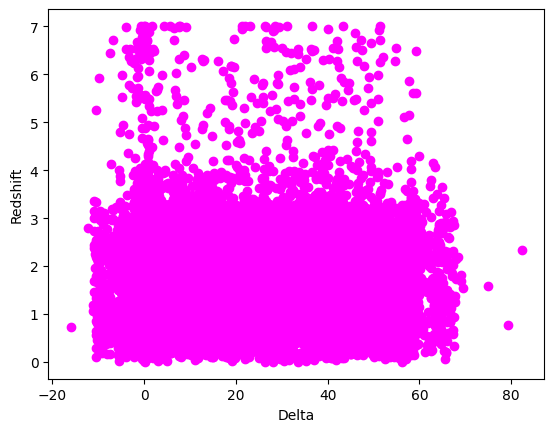

In [245]:
#Plotting delta and redshift for only quasar observations

x=df2['delta']
y=df2['redshift']
plt.scatter(x,y, c='magenta')
plt.xlabel('Delta')
plt.ylabel('Redshift')
plt.show()

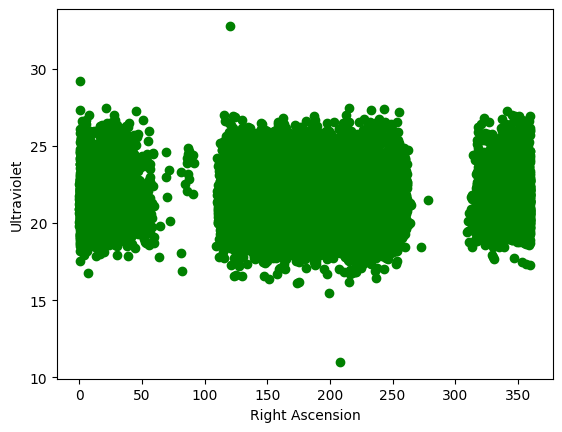

In [246]:
x=df2['alpha']
y=df2['u']
plt.scatter(x,y, c='green')
plt.xlabel('Right Ascension')
plt.ylabel('Ultraviolet')
plt.show()